# Práctico 1 
Los conjuntos de datos del mundo real son desordenados. No hay forma de evitarlo: los conjuntos de datos tienen datos faltantes, su formato no es el que deseamos (la cantidad de formatos en los que se pueden almacenar datos es infinita) y la mejor estructura para compartir datos no siempre es la óptima para analizarlos, de ahí la necesidad de limpiarlos, ordenarlos, parsearlos, o de acuerdo al término en ingles: [munge](http://dictionary.reference.com/browse/munge). Como se ha señalado correctamente en muchos puntos de venta ([por ej](http://www.nytimes.com/2014/08/18/technology/for-big-data-scientists-hurdle-to-insights-is-janitor- work.html? _r = 0)), la mayor parte del tiempo [gastado](https://twitter.com/BigDataBorat/status/306596352991830016) en lo que se llama (Geo) Ciencia de Datos está relacionado no solo con el modelado sofisticado y perspicaz, pero tiene que ver con tareas mucho más básicas y menos exóticas, como obtener datos, procesarlos, convertirlos en una forma que haga posible el análisis y explorarlos para conocer sus propiedades básicas.

Por lo intensivo y relevante que es este aspecto, sorprendentemente se ha publicado muy poco sobre patrones, técnicas y mejores prácticas para una limpieza, manipulación y transformación de datos rápida y eficiente. En esta clase, usaremos algunos conjuntos de datos del mundo real y aprenderemos cómo procesarlos en Python para que puedan ser transformados y analizados. Para esto, presentaremos parte de lo fundamental del análisis de datos y la computación científica en Python. Estas son herramientas fundamentales que se utilizan constantemente en casi cualquier tarea relacionada con el análisis de datos.

Este *notebook* cubre lo básico y el contenido que se espera que sea aprendido por cada estudiante. Usamos un conjunto de datos preparado que nos ahorra gran parte del procesamiento más complejo que va más allá del nivel introductorio al que se dirige la clase. 

En este cuaderno, discutimos varios patrones para limpiar y estructurar los datos de manera adecuada, que incluyen ordenar, subconjuntos y agregar; y terminamos con una visualización básica. 

Antes de tener nuestras manos sucias de datos, permítanos importar todas las librerias adicionales que vamos a necesitar.

In [1]:
#sumar grupy by lmabda primer elmento

In [2]:
import pandas as pd    # Pandas es la libreria de manipulacion de datos tabulares por excelencia
import IPython.display as display
import numpy as np

La libreria principal para trabajar tablas de datos como las que estamos acostumbrados/as se llama **Pandas**. 

# Dataframes de Pandas


Vamos a usar la data de molinetes del subte. Se puede descargar del [portal de datos abiertos del Gobierno de la Ciudad](https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes)


In [3]:
db = pd.read_csv('../data/molinetes_historico_2018.csv',sep=';')
db.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_CBARROS_S_TURN01,CASTRO BARROS,1,0,0,1,40
1,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_LIMA_S_TURN03,LIMA,4,0,0,4,33
2,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PASCO_TURN01,PASCO,1,0,0,1,36
3,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PERU_S_TURN01,PERU,4,0,0,4,31
4,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PJUNTA_S_TURN02,PRIMERA JUNTA,2,0,0,2,43


In [4]:
pd.read_csv?

In [5]:
db.shape

(1947641, 12)

Finalmente luego de tanto encerar y pulir, de listas, strings, etc. podemos dedicarnos a un objeto que nos resulta realmente útil para nuestra práctica cotidiana: una tabla de datos o *data frame*

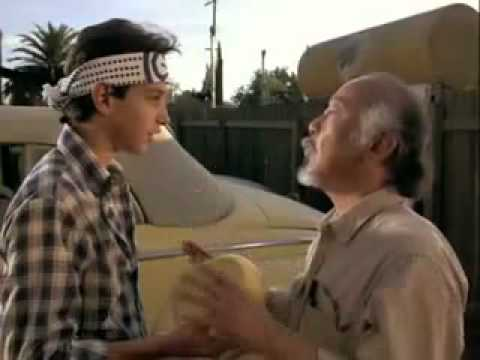

In [6]:
display.YouTubeVideo('fULNUr0rvEc')

Detengámonos un momento para saber cómo hemos leído el archivo. Estos son los aspectos principales a tener en cuenta:

* Estamos utilizando el método `read_csv` de la biblioteca `pandas`, que hemos importado con el alias `pd`.
* En esta forma simple, todo lo que se requiere es pasar la ruta al archivo que queremos leer, y en nuestro caso el separador que no es la coma tradicional, sino el punto y coma. Esto se debe a que nuestro separador decimal es la coma, mientras que el separador de miles es el punto. Por eso, en los portales de datos no anglosajones, se tiene a utilizar ese separador. Si no separaría, por ejemplo, el campo latitud con valor -58,89 en dos campos -58 y 89.
* Tiene *muchísimos* más parámetros que serán de mucha utilidad más adelante

Inspeccionamos el objeto y vemos a qué tipo pertenece

In [7]:
#tambien se puede crear un data frame desde cero, utilizando diccionarios y listas de Python
nueva = pd.DataFrame({'nombre':['Felipe','Juana','Diego'],
                      'edad':[34,56,9]
})
nueva

,nombre,edad
0,Felipe,34
1,Juana,56
2,Diego,9


## 1 Primer resumen de nuestra tabla

In [8]:
#vemos que es un objeto dataframe. Más adelante veremos sus propiedades
type(db)

pandas.core.frame.DataFrame

In [9]:
#vemos información básica como las columnas, que tipo de datos almacenan, cuantas filas, cuanta memoria ocupa, etc
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947641 entries, 0 to 1947640
Data columns (total 12 columns):
PERIODO            int64
FECHA              object
DESDE              object
HASTA              object
LINEA              object
MOLINETE           object
ESTACION           object
PAX_PAGOS          int64
PAX_PASES_PAGOS    int64
PAX_FRANQ          int64
TOTAL              int64
ID                 int64
dtypes: int64(6), object(6)
memory usage: 178.3+ MB


In [10]:
#podemos ver las dimensiones expresadas en (filas,columnas)
db.shape

(1947641, 12)

In [11]:
#podemos obtener la cantidad de registros solamente
db.shape[0]

1947641

In [12]:
#o de otro modo
len(db)

1947641

* Resumen de los valores de la tabla

In [13]:
db.describe()

,PERIODO,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
count,1.947641e+06,1.947641e+06,1.947641e+06,1.947641e+06,1.947641e+06,1.947641e+06
mean,2.018015e+05,2.284090e+01,1.503819e-02,6.732031e-01,2.352914e+01,4.439516e+01
std,4.992969e-01,2.559934e+01,1.253787e-01,1.201028e+00,2.596725e+01,2.546339e+01
min,2.018010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.018010e+05,5.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,2.100000e+01
50%,2.018010e+05,1.500000e+01,0.000000e+00,0.000000e+00,1.500000e+01,4.200000e+01
75%,2.018020e+05,3.100000e+01,0.000000e+00,1.000000e+00,3.200000e+01,6.900000e+01
max,2.018020e+05,3.700000e+02,3.000000e+00,3.600000e+01,3.700000e+02,8.600000e+01


Tenga en cuenta que el resultado también es un objeto `DataFrame`, por lo que puede hacer con él las mismas cosas que haría con la tabla original (por ejemplo, escribirla en un archivo).

En este caso, el resumen podría presentarse mejor si la tabla es "transpuesta":

In [14]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,1947641.0,201801.473491,0.499297,201801.0,201801.0,201801.0,201802.0,201802.0
PAX_PAGOS,1947641.0,22.840898,25.599343,0.0,5.0,15.0,31.0,370.0
PAX_PASES_PAGOS,1947641.0,0.015038,0.125379,0.0,0.0,0.0,0.0,3.0
PAX_FRANQ,1947641.0,0.673203,1.201028,0.0,0.0,0.0,1.0,36.0
TOTAL,1947641.0,23.529140,25.967254,0.0,6.0,15.0,32.0,370.0
ID,1947641.0,44.395155,25.463393,1.0,21.0,42.0,69.0,86.0


## 2 Seleccionar y filtrar datos

¡Ahora estamos listos para comenzar a jugar e interrogar al conjunto de datos! Lo que tenemos a nuestro alcance es una tabla que  muestra la cantidad de transacciones por molinete de las lineas de subte de Buenos Aires cada 15 minutos. Veremos como seleccionar variables y casos, recortarla horizontal o verticalmente.

* Inspeccionando cómo se ve. Podemos verificar las líneas X (superiores) de la tabla pasando X al método `head` (` tail`). Por ejemplo, para las cinco líneas superiores e inferiores:

In [15]:
db.head(5)

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_CBARROS_S_TURN01,CASTRO BARROS,1,0,0,1,40
1,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_LIMA_S_TURN03,LIMA,4,0,0,4,33
2,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PASCO_TURN01,PASCO,1,0,0,1,36
3,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PERU_S_TURN01,PERU,4,0,0,4,31
4,201801,01/01/2018,08:00:00,08:15:00,LINEA_A,LINEA_A_PJUNTA_S_TURN02,PRIMERA JUNTA,2,0,0,2,43


In [16]:
db.tail(2)

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1947639,201802,28/02/2018,23:30:00,23:45:00,LINEA_E,LINEA_E_EMITRE_TURN02,EMILIO MITRE,0,0,0,0,53
1947640,201802,28/02/2018,23:30:00,23:45:00,LINEA_H,LINEA_H_VENEZUELA_NORTE_TURN01,VENEZUELA,1,0,0,1,4


In [17]:
# que periodos tenemos?
db.PERIODO.unique()

array([201801, 201802])

In [18]:
#cuantos casos en cada uno?
db.PERIODO.value_counts()

201801    1025451
201802     922190
Name: PERIODO, dtype: int64

In [19]:
#podemos verlo como distribucion de frecuencias en porcentajes 
db.PERIODO.value_counts() / len(db) * 100

201801    52.650925
201802    47.349075
Name: PERIODO, dtype: float64

In [20]:
#redondeamos el resultado
round(db.PERIODO.value_counts() / len(db) * 100,2)

201801    52.65
201802    47.35
Name: PERIODO, dtype: float64

In [21]:
#nos quedamos con la data mas reciente con el metodo LOC para seleccionar subset de datos
db = db.loc[db.PERIODO == 201802,:] 
db.PERIODO.value_counts()

201802    922190
Name: PERIODO, dtype: int64

In [22]:
#Si uno descompone lo que hicimos recien en las muñecas rusas que lo componen:

#primero esta el filtro que quisimos crear
filtro = db.PERIODO == 201802
filtro[:5]

1025451    True
1025452    True
1025453    True
1025454    True
1025455    True
Name: PERIODO, dtype: bool

`loc` nos permite filtrar filas utilizando una lista de Verdaderos y Falsos (True,False). También podemos filtrar columnas por el nombre. `loc` para filtrar utiliza listas `True` o `False` o los `indices` que veremos más adelante. Por lo pronto, veamos que podemos filtrar por las columnas utilizando sus nombres. 

In [23]:
db.columns

Index(['PERIODO', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [24]:
#elimino periodo porque ya se que es todo febrero
db = db.loc[:,['FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID']]
db.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_ACOYTE_S_TURN02,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_ALBERTI_TURN02,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_CARABOBO_E_TURN04,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_CBARROS_N_TURN01,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_FLORES_OESTE_TURN04,FLORES,1,0,0,1,82


In [25]:
#usamos true y false en columnas
db.loc[:5,[True, False,False, False, False, False, False,
       False, False, False, True]]

,FECHA,ID


In [26]:
#otro modo de hacer esto mismo (vinculado a la advertencia previa):
db.reindex(columns = ['FECHA', 'DESDE', 'HASTA', 'LINEA', 'ESTACION','TOTAL']).head(5)

,FECHA,DESDE,HASTA,LINEA,ESTACION,TOTAL
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1


Noten que el resultado anterior no se guardo en una variable (la misma o una nueva), con lo cual solo me **muestra** una tabla con menos columnas, no cambio la tabla original. Si veo la tabla original veo que sigue con las mismas columnas

In [27]:
db.head()

,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_ACOYTE_S_TURN02,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_ALBERTI_TURN02,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_CARABOBO_E_TURN04,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_CBARROS_N_TURN01,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,LINEA_A_FLORES_OESTE_TURN04,FLORES,1,0,0,1,82


In [28]:
#tamiben puedo eliminar la variable molinete porque a lo sumo vamos a trabajar con datos por estacion, no quiero tanta desagregacion
db = db.drop(['MOLINETE'],axis=1)
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82


## 3 Cuadros de doble entrada

Vimos como obtener una distribución de frecuencias. Ahora podemos ver una tabla de doble entrada.

In [29]:
#podemos unservar una tabla de doble entrada, de la vual solo vamos a ver los primer 5 registros 
pd.crosstab(db.ESTACION,db.LINEA).head()


LINEA,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H
ESTACION,,,,,,
9 DE JULIO,0,0,0,10185,0,0
ACOYTE,14877,0,0,0,0,0
AGUERO,0,0,0,6945,0,0
ALBERTI,5697,0,0,0,0,0
ANGEL GALLARDO,0,10379,0,0,0,0


In [30]:
#podemos verlo en porcentajes con el parametro 'normalize' que puede ser columns o index
tabla = pd.crosstab(db.ESTACION,db.LINEA,normalize='columns',margins=True, margins_name='Totales')
tabla.head() 

LINEA,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H,Totales
ESTACION,,,,,,,
9 DE JULIO,0.000000,0.000000,0.0,0.051844,0.0,0.0,0.011044
ACOYTE,0.074499,0.000000,0.0,0.000000,0.0,0.0,0.016132
AGUERO,0.000000,0.000000,0.0,0.035352,0.0,0.0,0.007531
ALBERTI,0.028529,0.000000,0.0,0.000000,0.0,0.0,0.006178
ANGEL GALLARDO,0.000000,0.047104,0.0,0.000000,0.0,0.0,0.011255


## 4 Elementos de un Pandas Dataframe

Ya hemos utilizado en alto nivel y de una manera utilitaria un dataframe haciendo algunas operaciones sencillas. Ahora vamos a intentar profundizar en los elementos que conforman un dataframe. Iremos desarmando las muñecas rusas. Volvamos a obtener la información del objeto

In [31]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 922190 entries, 1025451 to 1947640
Data columns (total 10 columns):
FECHA              922190 non-null object
DESDE              922190 non-null object
HASTA              922190 non-null object
LINEA              922190 non-null object
ESTACION           922190 non-null object
PAX_PAGOS          922190 non-null int64
PAX_PASES_PAGOS    922190 non-null int64
PAX_FRANQ          922190 non-null int64
TOTAL              922190 non-null int64
ID                 922190 non-null int64
dtypes: int64(5), object(5)
memory usage: 117.4+ MB


Vemos primero el tipo: class pandas.core.frame.DataFrame. Luego podemos ver el primer elemento que lo conforma: un índice

In [32]:
db.index

Int64Index([1025451, 1025452, 1025453, 1025454, 1025455, 1025456, 1025457,
            1025458, 1025459, 1025460,
            ...
            1947631, 1947632, 1947633, 1947634, 1947635, 1947636, 1947637,
            1947638, 1947639, 1947640],
           dtype='int64', length=922190)

In [33]:
db.head(3)

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75


El índice lo muestra en el notebook a la izquierda en negrita. Vemos que comienza en 1025451. Si vuelven al comienzo cuando cargamos la tabla por primera vez verán que comenzaba en 0. Recuerden que filtramos los casos de febrero, por eso ya no comienza en 0. En muchas ocasiones, el índice no es más que un número que identifica cada registro, desde 0 hasta la cantidad de registros (menos 1). En otros análisis, se puede indexar por un atributo que tenga significado, como puede ser una serie de tiempo.  

El segundo elemento que muestra son las columnas

In [34]:
db.columns

Index(['FECHA', 'DESDE', 'HASTA', 'LINEA', 'ESTACION', 'PAX_PAGOS',
       'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [35]:
#creamos una copia de la original para mostrar como podemos cambiar los nombres de las columnas
db_columnas = db.copy()

In [36]:
db_columnas.columns =  ['fecha','desde','hasta','linea','estacion','pagos','pases','franquicia','total','id']
db_columnas.head()

,fecha,desde,hasta,linea,estacion,pagos,pases,franquicia,total,id
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82


In [37]:
#podemos hacer lo mismo que haríamos con cualquier lista
db_columnas.columns = db_columnas.columns.map(str.upper)
db_columnas.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAGOS,PASES,FRANQUICIA,TOTAL,ID
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82


Si observamos cada columna, vemos que cada una de ellas es un objeto del tipo **Pandas Series** 

In [38]:
type(db.FECHA)

pandas.core.series.Series

Vemos tambien que tienen un indice:

In [39]:
db.FECHA.head()

1025451    01/02/2018
1025452    01/02/2018
1025453    01/02/2018
1025454    01/02/2018
1025455    01/02/2018
Name: FECHA, dtype: object

Si vemos las otras columnas, todas tienen el mismo indice:

In [40]:
db.DESDE.head()

1025451    05:30:00
1025452    05:30:00
1025453    05:30:00
1025454    05:30:00
1025455    05:30:00
Name: DESDE, dtype: object

Por lo tanto podemos pensar en que los **Dataframes** son un conjunto de **Series**, que comparten el mismo índice

##### Pequeña disgresión sobre *loc* e *iloc*
*iloc* sirve para obtener datos en base a su ubicación en la tabla, que es relativa, ya que uno puede ordenar la tabla de diferentes modos. *loc* selecciona en base a los valores 

In [41]:
#este comando devuelve error porque no existe el indice 0, porque lo filtramos previamente. 
#Si leemos el texto del error nos da indicios de esta situación

db.FECHA.loc[0]

KeyError: 'the label [0] is not in the [index]'

In [48]:
#lo mismo vale para seleccionar dataframes
db.iloc[:2,:3]

,FECHA,DESDE,HASTA
1025451,01/02/2018,05:30:00,05:45:00
1025452,01/02/2018,05:30:00,05:45:00


In [49]:
#esto produce un error
#db.loc[:2,:3]

In [50]:
db.loc[[1025451,1025452],['FECHA','DESDE','HASTA']]

,FECHA,DESDE,HASTA
1025451,01/02/2018,05:30:00,05:45:00
1025452,01/02/2018,05:30:00,05:45:00


##### Fin de la pequeña disgresión sobre *loc* e *iloc*


## 5 Manipulacion de datos y crear columnas

Ahora vamos a ver el sentido de todo ese limar y pulir de la clase anterior. Queremos saber qué día es cada registro. Para eso vamos a tener que hacerle transformaciones a los datos.

In [51]:
db.FECHA.iloc[0]

'01/02/2018'

In [52]:
type(db.FECHA.iloc[0])

str

Como vemos es un texto simple. Pero hay diversas maneras de obtener el resultado que queremos. Comunmente no existe una única manera de solucionar un problema en Python, en cualquier lenguaje de programación, o en la vida misma. Esto da la sensación de libertad pero a la vez abruma.

Comencemos con el más sencillo. Sabemos que el día son los 2 primeros dígitos de la fecha.

In [53]:
db.FECHA.iloc[0][:2]

'01'

Pero nos gustaria que nos devuelva un número, no un caracter de texto

In [54]:
int(db.FECHA.iloc[0][:2])

1

Perfecto, ahora que sabemos lo que tenemos que hacer con un caso típico, podemos hacerlo para todos los casos. ¿Cómo? En la clase anterior vimos 3 modos:

* for loop
* list comprehension 
* map

Tenemos que repetir una misma tarea rutinaria una y otra vez sobre toda una serie de elementos. Esto es una buena indicación de que deberíamos crear una función.

In [55]:
def obtener_el_dia(fecha):
    '''
    Esta función toma una fecha en texto en formato dd/mm/yyyy
    y devuelve el día en un numero entero
    '''
    return int(fecha[:2])

Testeemos nuestra función

In [56]:
obtener_el_dia(db.FECHA.iloc[0])

1

In [57]:
help(obtener_el_dia)

Help on function obtener_el_dia in module __main__:

obtener_el_dia(fecha)
    Esta función toma una fecha en texto en formato dd/mm/yyyy
    y devuelve el día en un numero entero



In [58]:
import time #esto nos va a permitir ver cuanto tarda en correr nuestro codigo y ver la diferencia en los 3 metodos

In [59]:
#aplicamos nuestra funcion a las fechas de los 3 modos
#NOTEN COMO PODEMOS UTILIZAR EL INDEX DEL PANDAS DATAFRAME Y COMO USAMOS LOC Y NO ILOC
start = time.time()
fechas_loop = []
for i in db.index:
    dia = obtener_el_dia(db.FECHA.loc[i])
    fechas_loop.append(dia) 
    #noten como append modifica la lista fehcas_loop sin tener que guardar el resultado en una nueva variable
end = time.time()
print('tardo en ejecutar',round(end - start),'segundos')

tardo en ejecutar 30 segundos


In [60]:
#lis comprehension
start = time.time()
fechas_list_comp = [obtener_el_dia(db.FECHA.loc[i]) for i in db.index]
end = time.time()
print('tardo en ejecutar',round(end - start),'segundos')

tardo en ejecutar 29 segundos


In [61]:
#ambas producen la misma lista?
fechas_list_comp == fechas_loop

True

In [62]:
#map
start = time.time()
fechas_map = db.FECHA.map(obtener_el_dia)
end = time.time()
print('tardo en ejecutar',round(end - start),'segundos')


tardo en ejecutar 0 segundos


In [63]:
type(fechas_list_comp)

list

In [64]:
type(fechas_map)

pandas.core.series.Series

In [65]:
#produce lo mismo? si y no. El resultado es una serie de pandas, no una lista. 
#Al evaluarla contra la lista, evalua punto por punto
(fechas_map == fechas_list_comp).sum()

922190

In [66]:
db.shape

(922190, 10)

In [67]:
#si lo convertimos primero en una lista, ahi si podemos comparar peras con manzamas, lista con lista
list(fechas_map) == fechas_list_comp

True

In [68]:
#guardamos nuestros dias en una nueva columna de nuestro dataframe
db['dia'] = fechas_map

In [69]:
#esta es una forma mas correctares
db.loc[:,'dia'] = fechas_map

In [70]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,1
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,1
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,1
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,1
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,1


Ahora, nosotros podemos saber si el dia fue el 1ero o el 15. Pero al analizar flujo de transporte, es más importante saber si fue lunes o domingo que si fue principio o fin de mes. Entonces queremos saber que dia de la semana fue ese dia

In [71]:
from datetime import datetime #esta es una nueva libreria que me deja manipular fechas

Esta librería nos va a dejar trabajar con objetos de tipo *datetime* que tienen algunas propiedades que nos van a resultar convenientes

In [72]:
fecha = datetime.strptime(db.FECHA.iloc[0],'%d/%m/%Y')
fecha

datetime.datetime(2018, 2, 1, 0, 0)

In [73]:
type(fecha)

datetime.datetime

Una de esas propiedades es la de obtener el día calendario con el metodo o función *weekday()*

In [74]:
datetime.strptime(db.FECHA.iloc[0],'%d/%m/%Y').weekday()

3

In [75]:
help(datetime.weekday)

Help on method_descriptor:

weekday(...)
    Return the day of the week represented by the date.
    Monday == 0 ... Sunday == 6



In [76]:
def obtener_dia_semana(fecha):
    return datetime.strptime(fecha,'%d/%m/%Y').weekday()

In [77]:
db.loc[:,'dia_semana'] = db.FECHA.map(obtener_dia_semana)

In [78]:
type(db.dia_semana.iloc[0])

numpy.int64

In [79]:
db.dia_semana = db.dia_semana.replace({0:'lunes',
                                      1:'martes',
                                      2:'miercoles',
                                      3:'jueves',
                                      4:'viernes',
                                      5:'sabado',
                                      6:'domingo'})

In [80]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia,dia_semana
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,1,jueves
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,1,jueves
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,1,jueves
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,1,jueves
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,1,jueves


## 6 Agrupación, transformación, agregación

Una de las ventajas de conjuntos de datos ordenados es que permiten realizar transformaciones avanzadas de una manera más directa. Una de las más comunes es lo que se llama operaciones "grupales". Originadas en el mundo de las bases de datos, estas operaciones le permiten agrupar las observaciones en una tabla mediante una de sus etiquetas, índice o categoría, y aplicar operaciones en el grupo de datos por grupo.

Por ejemplo, dada nuestra tabla ordenada por linea, estacion, dia, calcular la suma total de transacciones agrupadas por diferentes categorias.

Para hacer esto en `pandas`, podemos usar uno de sus caballos de batalla, y también una de las razones por las que la biblioteca se ha vuelto tan popular: el operador` groupby`.


In [81]:
trx_por_dia = db.loc[:,['dia_semana','TOTAL']].groupby('dia_semana').sum()
trx_por_dia.sort_values(by='dia_semana')

,TOTAL
dia_semana,
domingo,879555
jueves,4355152
lunes,3425814
martes,3492268
miercoles,4410555
sabado,1679069
viernes,4219833


In [82]:
#tambien podemos elegir otras funciones
db.loc[:,['LINEA','TOTAL']].groupby(['LINEA']).describe()

TOTAL                                                   
            count       mean        std  min  25%   50%   75%    max
LINEA                                                               
LINEA_A  199694.0  21.029610  23.206348  0.0  5.0  14.0  28.0  246.0
LINEA_B  220342.0  27.247134  29.400228  0.0  6.0  17.0  39.0  248.0
LINEA_C  120796.0  30.644409  35.349491  0.0  6.0  18.0  42.0  244.0
LINEA_D  196455.0  26.287465  25.078798  0.0  6.0  19.0  40.0  227.0
LINEA_E   86704.0  16.122809  17.570946  0.0  5.0  11.0  21.0  165.0
LINEA_H   98199.0  20.317244  19.837206  0.0  6.0  15.0  29.0  209.0

In [83]:
pd.isnull(0)

False

In [84]:
#incluso podemos introducir diferentes funciones que querramos a eleccion
db.loc[:,['LINEA','TOTAL']].groupby(['LINEA']).agg([np.sum,np.std,np.mean])

TOTAL                      
             sum        std       mean
LINEA                                 
LINEA_A  4199487  23.206348  21.029610
LINEA_B  6003688  29.400228  27.247134
LINEA_C  3701722  35.349491  30.644409
LINEA_D  5164304  25.078798  26.287465
LINEA_E  1397912  17.570946  16.122809
LINEA_H  1995133  19.837206  20.317244

In [85]:
#podemos ordenar los datos
trx_por_dia.sort_values(by='TOTAL',ascending = False)

,TOTAL
dia_semana,
miercoles,4410555
jueves,4355152
viernes,4219833
martes,3492268
lunes,3425814
sabado,1679069
domingo,879555


In [86]:
#podemos agrupar por dos categorias
trx_por_dia_linea = db.loc[:,['LINEA','dia_semana','TOTAL']].groupby(['LINEA','dia_semana']).sum()
trx_por_dia_linea.sort_values(by=['LINEA','TOTAL'],ascending=False)


TOTAL
LINEA   dia_semana         
LINEA_H miercoles    383491
        jueves       372811
        viernes      364967
        martes       310076
        lunes        294634
        sabado       177482
        domingo       91672
LINEA_E miercoles    283631
        jueves       272055
        viernes      256874
        martes       216906
        lunes        213073
        sabado        97894
        domingo       57479
LINEA_D miercoles   1024749
        jueves      1006073
        viernes      966690
        martes       821436
        lunes        789612
        sabado       356074
        domingo      199670
LINEA_C miercoles    720895
        jueves       711073
        viernes      687263
        martes       566895
        lunes        566414
        sabado       292393
        domingo      156789
LINEA_B miercoles   1172988
        jueves      1169374
        viernes     1148668
        lunes        920447
        martes       906212
        sabado       456452
        domingo      229547
LINEA_A miercoles    824801
        jueves       823766
        viernes      795371
        martes       670743
        lunes        641634
        sabado       298774
        domingo      144398

In [87]:
#o 3
trx_por_linea_estacion = db.loc[:,['LINEA','ESTACION','TOTAL']].groupby(['LINEA','ESTACION']).sum()
trx_por_linea_estacion.sort_values(by='TOTAL',ascending=False).head(10)

TOTAL
LINEA   ESTACION                    
LINEA_C CONSTITUCION         1728235
        RETIRO                889799
LINEA_B FEDERICO LACROZE      686951
LINEA_D CATEDRAL              648762
        CONGRESO DE TUCUMAN   648110
LINEA_B ROSAS                 549475
LINEA_A SAN PEDRITO           544353
LINEA_B LEANDRO N. ALEM       531562
        CARLOS PELLEGRINI     462433
        FLORIDA               438910

Supongamos que queremos ver solamente las estaciones de la linea B para ver cuales son las que tienen la mayor cantidad de pasajeros. Vamos a encontrarnos con una dificultad.  

In [88]:
#si observamos las columnas vemos que no es ningun problema
trx_por_linea_estacion.columns

Index(['TOTAL'], dtype='object')

In [89]:
#pero cuando vemos el indice vemos que es diferente, es de tipo MultiIndex
trx_por_linea_estacion.index

MultiIndex(levels=[['LINEA_A', 'LINEA_B', 'LINEA_C', 'LINEA_D', 'LINEA_E', 'LINEA_H'], ['9 DE JULIO', 'ACOYTE', 'AGUERO', 'ALBERTI', 'ANGEL GALLARDO', 'AVENIDA DE MAYO', 'AVENIDA LA PLATA', 'BOEDO', 'BOLIVAR', 'BULNES', 'CALLAO', 'CALLAO.B', 'CARABOBO', 'CARLOS GARDEL', 'CARLOS PELLEGRINI', 'CASEROS', 'CASTRO BARROS', 'CATEDRAL', 'CONGRESO', 'CONGRESO DE TUCUMAN', 'CONSTITUCION', 'CORDOBA', 'CORRIENTES', 'DIAGONAL NORTE', 'DORREGO', 'ECHEVERRIA', 'EMILIO MITRE', 'ENTRE RIOS', 'FACULTAD DE MEDICINA', 'FEDERICO LACROZE', 'FLORES', 'FLORIDA', 'GENERAL BELGRANO', 'GENERAL SAN MARTIN', 'HOSPITALES', 'HUMBERTO I', 'INCLAN', 'INDEPENDENCIA', 'INDEPENDENCIA.H', 'JOSE HERNANDEZ', 'JOSE MARIA MORENO', 'JUJUY', 'JURAMENTO', 'LAS HERAS', 'LAVALLE', 'LEANDRO N. ALEM', 'LIMA', 'LORIA', 'LOS INCAS', 'MALABIA', 'MARIANO MORENO', 'MEDALLA MILAGROSA', 'MEDRANO', 'MINISTRO CARRANZA', 'OLLEROS', 'ONCE', 'PALERMO', 'PASCO', 'PASTEUR', 'PATRICIOS', 'PERU', 'PICHINCHA', 'PIEDRAS', 'PLAZA DE MAYO', 'PLAZA ITA

Todas las operaciones de tipo *groupby* devuelven tablas con indices multi-nivel. Si bien introduce una complejidad que enriquece para ciertas operaciones, en lo cotidiano puede resultar algo molesto. Para eso existe un modo sencillo de resolver el problema.  

In [90]:
tabla_simple = trx_por_linea_estacion.reset_index()
tabla_simple.head()

,LINEA,ESTACION,TOTAL
0,LINEA_A,ACOYTE,287871
1,LINEA_A,ALBERTI,97189
2,LINEA_A,CARABOBO,234365
3,LINEA_A,CASTRO BARROS,187937
4,LINEA_A,CONGRESO,280483


Ese comando resetea el index, alojando el index anterior como columnas. Lo que nos devuelve un dataframe "tradicional" manipulable de manera más intuitiva. Aunque eso es relativo, si les interesa profundizar, a continuación hay una pequeña disgresión donde profundiza aún más y se relativiza lo "intuitivo". 

In [91]:
tabla_simple.index

RangeIndex(start=0, stop=86, step=1)

In [92]:
tabla_simple.loc[tabla_simple.LINEA == 'LINEA_B',:].sort_values(by='TOTAL',ascending=False).head()

,LINEA,ESTACION,TOTAL
24,LINEA_B,FEDERICO LACROZE,686951
32,LINEA_B,ROSAS,549475
26,LINEA_B,LEANDRO N. ALEM,531562
21,LINEA_B,CARLOS PELLEGRINI,462433
25,LINEA_B,FLORIDA,438910


### Disgresión con más detalles sobre MultiIndex 

Los índices múltiples en realidad no son más tanto complejos, sólo que tienen un tratamiento algo diferente. Veamos como seleccionar datos en tablas con indices múltiples. En la tabla original, uno puede buscar primero por columna y luego por el indice de esa columna (recordemos que los **Dataframe** son **Series** ordenadas, esto sería buscar una **Serie** primero al nombrarla por el nombre de la columna y luego un indice dentro de la **Serie**) 

In [93]:
#asi buscamos un valor puntal en los dataframes. Pero en un dataframe con un indice simple, "dentro" de esta muñeca rusa,
# para una columna y una fila, hay una sola celda
db['FECHA'][1025451]

'01/02/2018'

In [94]:
# podemos hacerlo mismo primero por columna y luego por fila. Solo que al ser un indice doble para las filas, 
# dentro de esa fila no hay una celda, sino una Serie
trx_por_linea_estacion['TOTAL']['LINEA_B']

ESTACION
ANGEL GALLARDO       307023
CALLAO.B             343178
CARLOS GARDEL        358071
CARLOS PELLEGRINI    462433
DORREGO              233096
ECHEVERRIA           140513
FEDERICO LACROZE     686951
FLORIDA              438910
LEANDRO N. ALEM      531562
LOS INCAS            220339
MALABIA              404634
MEDRANO              339923
PASTEUR              259481
PUEYRREDON           265056
ROSAS                549475
TRONADOR             122305
URUGUAY              340738
Name: TOTAL, dtype: int64

In [95]:
#loc nos permitia hacer una operacion similar
db.loc[1025451,'FECHA']

'01/02/2018'

In [96]:
db.loc[[1025451,1025452],'FECHA']

1025451    01/02/2018
1025452    01/02/2018
Name: FECHA, dtype: object

In [97]:
#buscamos con loc para un indice multiple
trx_por_linea_estacion.loc[['LINEA_B'],'TOTAL']

LINEA    ESTACION         
LINEA_B  ANGEL GALLARDO       307023
         CALLAO.B             343178
         CARLOS GARDEL        358071
         CARLOS PELLEGRINI    462433
         DORREGO              233096
         ECHEVERRIA           140513
         FEDERICO LACROZE     686951
         FLORIDA              438910
         LEANDRO N. ALEM      531562
         LOS INCAS            220339
         MALABIA              404634
         MEDRANO              339923
         PASTEUR              259481
         PUEYRREDON           265056
         ROSAS                549475
         TRONADOR             122305
         URUGUAY              340738
Name: TOTAL, dtype: int64

In [98]:
#buscamos mas de una linea
trx_por_linea_estacion.loc[['LINEA_B','LINEA_C'],'TOTAL']

LINEA    ESTACION          
LINEA_B  ANGEL GALLARDO         307023
         CALLAO.B               343178
         CARLOS GARDEL          358071
         CARLOS PELLEGRINI      462433
         DORREGO                233096
         ECHEVERRIA             140513
         FEDERICO LACROZE       686951
         FLORIDA                438910
         LEANDRO N. ALEM        531562
         LOS INCAS              220339
         MALABIA                404634
         MEDRANO                339923
         PASTEUR                259481
         PUEYRREDON             265056
         ROSAS                  549475
         TRONADOR               122305
         URUGUAY                340738
LINEA_C  AVENIDA DE MAYO        125177
         CONSTITUCION          1728235
         DIAGONAL NORTE         132866
         GENERAL SAN MARTIN     203913
         INDEPENDENCIA          130773
         LAVALLE                215570
         MARIANO MORENO         160561
         RETIRO                 8897

In [99]:
#buscamos estaciones puntuales dentro de esas lineas
trx_por_linea_estacion.loc[[('LINEA_B','CALLAO.B'),('LINEA_C','CONSTITUCION')],'TOTAL']

LINEA    ESTACION    
LINEA_B  CALLAO.B         343178
LINEA_C  CONSTITUCION    1728235
Name: TOTAL, dtype: int64

Cuando usamos agg (corto para *aggregate*) nos queda una tabla con multiindice en las columnas. Los datos en estas tablas también pueden accederse con el mismo criterio.

In [100]:
resumen = db.loc[:,['LINEA','TOTAL','PAX_PASES_PAGOS']].groupby(['LINEA']).describe()
resumen

PAX_PASES_PAGOS                                               \
                  count      mean       std  min  25%  50%  75%  max   
LINEA                                                                  
LINEA_A        199694.0  0.008628  0.094097  0.0  0.0  0.0  0.0  3.0   
LINEA_B        220342.0  0.013824  0.118802  0.0  0.0  0.0  0.0  3.0   
LINEA_C        120796.0  0.011731  0.112189  0.0  0.0  0.0  0.0  3.0   
LINEA_D        196455.0  0.015927  0.128009  0.0  0.0  0.0  0.0  3.0   
LINEA_E         86704.0  0.013956  0.119740  0.0  0.0  0.0  0.0  2.0   
LINEA_H         98199.0  0.011752  0.110104  0.0  0.0  0.0  0.0  3.0   

            TOTAL                                                     
            count       mean        std  min  25%   50%   75%    max  
LINEA                                                                 
LINEA_A  199694.0  21.029610  23.206348  0.0  5.0  14.0  28.0  246.0  
LINEA_B  220342.0  27.247134  29.400228  0.0  6.0  17.0  39.0  248.0  
LINEA_C  120796.0  30.644409  35.349491  0.0  6.0  18.0  42.0  244.0  
LINEA_D  196455.0  26.287465  25.078798  0.0  6.0  19.0  40.0  227.0  
LINEA_E   86704.0  16.122809  17.570946  0.0  5.0  11.0  21.0  165.0  
LINEA_H   98199.0  20.317244  19.837206  0.0  6.0  15.0  29.0  209.0

In [101]:
resumen.index

Index(['LINEA_A', 'LINEA_B', 'LINEA_C', 'LINEA_D', 'LINEA_E', 'LINEA_H'], dtype='object', name='LINEA')

In [102]:
db.columns

Index(['FECHA', 'DESDE', 'HASTA', 'LINEA', 'ESTACION', 'PAX_PAGOS',
       'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID', 'dia', 'dia_semana'],
      dtype='object')

In [103]:
resumen.loc['LINEA_A',['TOTAL','PAX_PASES_PAGOS']]

PAX_PASES_PAGOS  count    199694.000000
                 mean          0.008628
                 std           0.094097
                 min           0.000000
                 25%           0.000000
                 50%           0.000000
                 75%           0.000000
                 max           3.000000
TOTAL            count    199694.000000
                 mean         21.029610
                 std          23.206348
                 min           0.000000
                 25%           5.000000
                 50%          14.000000
                 75%          28.000000
                 max         246.000000
Name: LINEA_A, dtype: float64

In [104]:
resumen.loc['LINEA_A',('TOTAL','count')]

199694.0

In [105]:
resumen.loc[['LINEA_A','LINEA_B'],('TOTAL','count')]

LINEA
LINEA_A    199694.0
LINEA_B    220342.0
Name: (TOTAL, count), dtype: float64

In [106]:
resumen.loc[['LINEA_A','LINEA_B'],('TOTAL',['count','mean'])]

TOTAL           
            count       mean
LINEA                       
LINEA_A  199694.0  21.029610
LINEA_B  220342.0  27.247134

In [107]:
resumen.loc[['LINEA_A','LINEA_B'],[('TOTAL','count'),('TOTAL','mean')]]

TOTAL           
            count       mean
LINEA                       
LINEA_A  199694.0  21.029610
LINEA_B  220342.0  27.247134

Sin embargo, la solución sencilla este caso que es resetar los indices, no arroja un resultado satisfactorio

In [108]:
resumen = db.loc[:,['LINEA','TOTAL']].groupby(['LINEA']).describe()


In [109]:
resumen.reset_index()

LINEA     TOTAL                                                   
               count       mean        std  min  25%   50%   75%    max
0  LINEA_A  199694.0  21.029610  23.206348  0.0  5.0  14.0  28.0  246.0
1  LINEA_B  220342.0  27.247134  29.400228  0.0  6.0  17.0  39.0  248.0
2  LINEA_C  120796.0  30.644409  35.349491  0.0  6.0  18.0  42.0  244.0
3  LINEA_D  196455.0  26.287465  25.078798  0.0  6.0  19.0  40.0  227.0
4  LINEA_E   86704.0  16.122809  17.570946  0.0  5.0  11.0  21.0  165.0
5  LINEA_H   98199.0  20.317244  19.837206  0.0  6.0  15.0  29.0  209.0

In [110]:
#vemos que tenemos un indice multiple a nivel de COLUMNAS 
resumen.reset_index().columns

MultiIndex(levels=[['TOTAL', 'LINEA'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '']],
           labels=[[1, 0, 0, 0, 0, 0, 0, 0, 0], [8, 0, 1, 2, 3, 4, 5, 6, 7]])

In [111]:
#en este caso, cuando el indice multiple esta en las columnas, siempre podemos modificar eliminano un nivel
resumen.columns = resumen.columns.droplevel(0)
resumen

,count,mean,std,min,25%,50%,75%,max
LINEA,,,,,,,,
LINEA_A,199694.0,21.029610,23.206348,0.0,5.0,14.0,28.0,246.0
LINEA_B,220342.0,27.247134,29.400228,0.0,6.0,17.0,39.0,248.0
LINEA_C,120796.0,30.644409,35.349491,0.0,6.0,18.0,42.0,244.0
LINEA_D,196455.0,26.287465,25.078798,0.0,6.0,19.0,40.0,227.0
LINEA_E,86704.0,16.122809,17.570946,0.0,5.0,11.0,21.0,165.0
LINEA_H,98199.0,20.317244,19.837206,0.0,6.0,15.0,29.0,209.0


In [112]:
#si desean que la linea este en las columnas, pueden resetear el index de nuevo
resumen_reset = resumen.reset_index()
resumen_reset

,LINEA,count,mean,std,min,25%,50%,75%,max
0,LINEA_A,199694.0,21.029610,23.206348,0.0,5.0,14.0,28.0,246.0
1,LINEA_B,220342.0,27.247134,29.400228,0.0,6.0,17.0,39.0,248.0
2,LINEA_C,120796.0,30.644409,35.349491,0.0,6.0,18.0,42.0,244.0
3,LINEA_D,196455.0,26.287465,25.078798,0.0,6.0,19.0,40.0,227.0
4,LINEA_E,86704.0,16.122809,17.570946,0.0,5.0,11.0,21.0,165.0
5,LINEA_H,98199.0,20.317244,19.837206,0.0,6.0,15.0,29.0,209.0


Pero en esto se puede ver la ventaja de usar indices que no sean simplemente números, si no que podemos indexar por algo significativo como la línea. De esta manera es más sencillo acceder a los datos

In [113]:
resumen.loc[['LINEA_A'],:]

,count,mean,std,min,25%,50%,75%,max
LINEA,,,,,,,,
LINEA_A,199694.0,21.02961,23.206348,0.0,5.0,14.0,28.0,246.0


In [114]:
#en lugar de:
resumen_reset.loc[resumen_reset.LINEA == 'LINEA_A',:]

,LINEA,count,mean,std,min,25%,50%,75%,max
0,LINEA_A,199694.0,21.02961,23.206348,0.0,5.0,14.0,28.0,246.0


Esta forma de indexar genera formas mas complejas y más potentes de acceder y organizar los datos. Como siempre, se trata de juzgar en qué medida esa complejidad es necesaria.

### Fin de disgresión con más detalles sobre MultiIndex 

## 7 Formatos largos y anchos

Volvamos a nuestra dataframe que venimos trabajando para ver una cuestion de estructura de los datos. Los llamados formatos *anchos* y *largos*

In [115]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia,dia_semana
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,1,jueves
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,1,jueves
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,1,jueves
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,1,jueves
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,1,jueves


In [116]:
#generamos primero un agregado por linea y estacion para obtener una suma por estacion para todo el mes
subset = db.loc[:,['LINEA','ESTACION','PAX_PAGOS','PAX_PASES_PAGOS','PAX_FRANQ']]
subset = subset.groupby(['LINEA','ESTACION']).sum().reset_index()
subset.head()


,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ
0,LINEA_A,ACOYTE,275169,155,12547
1,LINEA_A,ALBERTI,92161,71,4957
2,LINEA_A,CARABOBO,224609,177,9579
3,LINEA_A,CASTRO BARROS,179647,117,8173
4,LINEA_A,CONGRESO,270344,87,10052


In [117]:
#podemos convertir este formato "ancho" en "largo"
subset = pd.wide_to_long(df = subset,stubnames = 'PAX_', i=['LINEA','ESTACION'], j="tipo",suffix='\w+')
subset = subset.reset_index()
subset.head()

,LINEA,ESTACION,tipo,PAX_
0,LINEA_A,ACOYTE,PAGOS,275169
1,LINEA_A,ACOYTE,PASES_PAGOS,155
2,LINEA_A,ACOYTE,FRANQ,12547
3,LINEA_A,ALBERTI,PAGOS,92161
4,LINEA_A,ALBERTI,PASES_PAGOS,71


In [118]:
#podemos hacer lo contrario y pasar de largo a ancho
subset.pivot_table(index=['LINEA','ESTACION'], columns='tipo', values='PAX_')

tipo                          FRANQ   PAGOS  PASES_PAGOS
LINEA   ESTACION                                        
LINEA_A ACOYTE                12547  275169          155
        ALBERTI                4957   92161           71
        CARABOBO               9579  224609          177
        CASTRO BARROS          8173  179647          117
        CONGRESO              10052  270344           87
        FLORES                 9331  236444          122
        LIMA                   6022  157168           56
        LORIA                  6440  153616           83
        PASCO                  3864   75288           30
        PERU                   7412  294429          105
        PIEDRAS                3055  146813           39
        PLAZA DE MAYO          7826  362598          154
        PLAZA MISERERE         7495  285743          119
        PRIMERA JUNTA          9884  259983          104
        PUAN                      0  127074            0
        RIO DE JANEIRO        10138  198936          119
        SAENZ PEÑA             7576  189144           79
        SAN PEDRITO            6747  537500          106
LINEA_B ANGEL GALLARDO        13529  293287          207
        CALLAO.B                  0  343178            0
        CARLOS GARDEL         10856  347092          123
        CARLOS PELLEGRINI     11474  450747          212
        DORREGO                7629  225341          126
        ECHEVERRIA             5270  135085          158
        FEDERICO LACROZE      24452  662112          387
        FLORIDA               12453  426219          238
        LEANDRO N. ALEM       10774  520579          209
        LOS INCAS              8567  211591          181
        MALABIA               15994  388384          256
        MEDRANO               15025  324729          169
...                             ...     ...          ...
LINEA_D PLAZA ITALIA           6569  252671          143
        PUEYRREDON.D           6669  205980           86
        SCALABRINI ORTIZ       7649  254134          197
        TRIBUNALES             9947  291528          173
LINEA_E AVENIDA LA PLATA       3979  100082           69
        BOEDO                  4294   92592           60
        BOLIVAR                5914  268793          123
        EMILIO MITRE           4305  109474           74
        ENTRE RIOS             2457   52265           47
        GENERAL BELGRANO       1915   57884           38
        INDEPENDENCIA.H        2660  114490           89
        JOSE MARIA MORENO      2509   78421           60
        JUJUY                  2629   64210           75
        MEDALLA MILAGROSA      1398   36559           55
        PICHINCHA              3117   49216           43
        PZA. DE LOS VIRREYES   6143  170778          268
        SAN JOSE               2314   50308           80
        URQUIZA                3437   58108           67
        VARELA                 1460   44991           62
LINEA_H CASEROS                4131  135591          108
        CORDOBA                4252  133956           86
        CORRIENTES             4798  128307           96
        HOSPITALES             4992  223419           91
        HUMBERTO I             4620  114782           90
        INCLAN                 4422   99076          104
        LAS HERAS              6607  270255          147
        ONCE                   7186  268665          124
        PATRICIOS              5486  199767          185
        SANTA FE               6127  211610           70
        VENEZUELA              5427  150503           53

[86 rows x 3 columns]

## Procesamiento para la clase siguiente

Nuestro objetivo es ver como se comporta el subte de acuerdo al dia y al tipo de hora. Tenemos que obtener entonces la hora del dia

In [119]:
#que estamos haciendo con esta operación??
db['hora'] = db.DESDE.map(lambda x: int(x[:2])) 
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia,dia_semana,hora
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,1,jueves,5
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,1,jueves,5
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,1,jueves,5
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,1,jueves,5
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,1,jueves,5


### Otra, pero la ultima, disgresion

Podríamos haber utilizado las funciones (o métodos) de los objetos del tipo datetime y así como extrajimos el tipo de día, extraer la hora. Pero repasemos lo que hicimos previamente. Primero utilizamos una funcion 

`
def obtener_dia_semana(fecha):
    return datetime.strptime(fecha,'%d/%m/%Y').weekday()
`

y la aplicamos con `map()` a la columna FECHA, que era un *string*.

`db.loc[:,'dia_semana'] = db.FECHA.map(obtener_dia_semana)`

La función que creamos, toma cada elemento de la fecha, cada string que hay en la **Serie** *FECHA*, lo transforma en tipo **datetime** y obtiene el día de la semana *DEJANDO COMO STRING LOS DATOS ORIGINALES*.

Podríamos obtener la hora del siguiente modo:

In [120]:
datetime.strptime(db.FECHA.iloc[0],'%d/%m/%Y').hour

0

Parecería que es la hora 0, pero si observamos bien, no es así:

In [121]:
db.iloc[100]

FECHA              01/02/2018
DESDE                05:30:00
HASTA                05:45:00
LINEA                 LINEA_A
ESTACION                LORIA
PAX_PAGOS                   4
PAX_PASES_PAGOS             0
PAX_FRANQ                   2
TOTAL                       6
ID                         39
dia                         1
dia_semana             jueves
hora                        5
Name: 1025551, dtype: object

En el campo fecha, no hay información sobre la hora. Esto se encuentra en los campos DESDE y HASTA

In [122]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia,dia_semana,hora
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,1,jueves,5
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,1,jueves,5
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,1,jueves,5
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,1,jueves,5
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,1,jueves,5


Pero aún si conteniese dicha información, nuestra función tomaba el texto, lo convertía en un objeto del tipo **datetime** y nos devolvía la hora como número entero. Podríamos tomar el campo DESDE y hacer el mismo proceso de convertisión. Sin embargo, estaríamos haciendo dos veces el mismo trabajo (tomar un **string**, convertirlo a **datetime** y luego extraer la hora y el día). 

Entonces podemos introducir dos consejos del pensamiento computacional:

* Saber de antemano qué vamos a hacer, planificar claramente y luego ejecutar
* Cuando un proceso se repite varias veces, es una señal de que algo mal estamos haciendo

Si sabemos de antemano que queremos obtener el tipo de día y hora, podemos crear una columna que contenga toda la información que deseamos (fecha y hora), luego convertir esta nueva columna UNA SOLA VEZ en objeto **datetime** y ahi sí extraer la información que deseamos


In [123]:
db['fecha_hora'] = pd.to_datetime(db.FECHA + ' ' + db.DESDE,format = '%d/%m/%Y %H:%M:%S')
db['hora_date'] = db.fecha_hora.map(lambda x: x.hour) 
db['dia_semana_date'] = db.fecha_hora.map(lambda x: x.weekday())

In [124]:
db.head()

,FECHA,DESDE,HASTA,LINEA,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID,dia,dia_semana,hora,fecha_hora,hora_date,dia_semana_date
1025451,01/02/2018,05:30:00,05:45:00,LINEA_A,ACOYTE,0,0,0,0,42,1,jueves,5,2018-02-01 05:30:00,5,3
1025452,01/02/2018,05:30:00,05:45:00,LINEA_A,ALBERTI,1,0,0,1,37,1,jueves,5,2018-02-01 05:30:00,5,3
1025453,01/02/2018,05:30:00,05:45:00,LINEA_A,CARABOBO,3,0,0,3,75,1,jueves,5,2018-02-01 05:30:00,5,3
1025454,01/02/2018,05:30:00,05:45:00,LINEA_A,CASTRO BARROS,6,0,0,6,40,1,jueves,5,2018-02-01 05:30:00,5,3
1025455,01/02/2018,05:30:00,05:45:00,LINEA_A,FLORES,1,0,0,1,82,1,jueves,5,2018-02-01 05:30:00,5,3


¿Por qué utilizamos `()` en `weekday()` mientras que no lo usamos en `hour`?

Esta diferencia responde a temas más profundos de lenguajes de programación orientados a objetos (Python es uno de ellos). La diferencia fundamental es que uno puede decidir cambiarle la hora, el día, el mes a un objeto. Podemos obligar a los datos a cambiar y que sean otros (supongamos que algún molinete tiene un error que suma 1 hora, entonces podríamos cambiarle la hora a todos los molinetes de esa estación). Pero el 9 de Octubre de 2018 es martes, si o si (por lo menos en el mundo occidental donde rige el [calendario gregoriano](https://en.wikipedia.org/wiki/List_of_calendars)).

Algo más en este [link](https://stackoverflow.com/questions/41617547/why-is-datetime-minute-an-attribute-while-datetime-weekday-is-a-function)

Sin embargo, el método que utilizamos de recortar los primeros 2 caracteres, también nos da la información que necesitamos. Nunca hay una solución única para un problema. Si encuentran una función efectiva, que resuelve el problema, aún cuando tarde más tiempo, es la solución correcta. 

### Fin de la ultima disgresión (de la clase)


Para concluir, queremos agrupar tipo de día de la semana, hora y estacion (vamos a usar el campo ID, que veremos en la clase 3 el por qué de usar ID y no el nombre ESTACION). Pero más que si un día es lunes o sábado, queremos saber si es día de semana o día hábil ya que esperamos que el comportamiento sea diferente en ambos casos. Podríamos repetir un `replace()` donde reemplacemos *lunes* por *no*, *domingo* por *si* y así sucesivamente. O podemos usar una `list compehension` con clausulas `if - else` que ademas deje como resultado directamente True or False para luego usar como filtros

In [125]:
db['fin_de_semana'] = [True if ((dia == 'domingo') | (dia == 'sabado')) else False for dia in db.dia_semana]

In [126]:
db.dia_semana.value_counts()

viernes      145069
miercoles    144533
jueves       144492
lunes        132308
martes       131936
sabado       126344
domingo       97508
Name: dia_semana, dtype: int64

In [127]:
#chequeamos que hayamos hecho bien el trabajo
db.fin_de_semana.value_counts()

False    698338
True     223852
Name: fin_de_semana, dtype: int64

In [128]:
 126344+97508

223852

In [129]:
db.fin_de_semana.sum()

223852

In [130]:
db.loc[~db.fin_de_semana,'dia_semana'].value_counts()

viernes      145069
miercoles    144533
jueves       144492
lunes        132308
martes       131936
Name: dia_semana, dtype: int64

In [131]:
#finalmente podemos procesar los datos
dataInsumo = db.loc[:,['fin_de_semana','hora','LINEA','ID','TOTAL']].groupby(['fin_de_semana','hora','LINEA','ID',]).mean().reset_index()
#cambiamos la ultima columnad de nombre a promedio, sumando la palabra promedio a los nombres hasta el ultimo exclusive  
dataInsumo.columns = dataInsumo.columns[:-1].tolist() + ['promedio']
dataInsumo.head()

,fin_de_semana,hora,LINEA,ID,promedio
0,False,5,LINEA_A,31,1.888889
1,False,5,LINEA_A,32,1.575000
2,False,5,LINEA_A,33,1.960526
3,False,5,LINEA_A,34,1.859649
4,False,5,LINEA_A,35,2.967105


In [132]:
#luego agregamos los quintiles, pero queremos que comiencen desde 1 no desde 0
#(la convención en estadística es diferente a Python)
dataInsumo['q'] = pd.qcut(dataInsumo.promedio,5,labels=False) + 1
dataInsumo.head()

,fin_de_semana,hora,LINEA,ID,promedio,q
0,False,5,LINEA_A,31,1.888889,1
1,False,5,LINEA_A,32,1.575000,1
2,False,5,LINEA_A,33,1.960526,1
3,False,5,LINEA_A,34,1.859649,1
4,False,5,LINEA_A,35,2.967105,1


In [133]:
dataInsumo.to_csv('../data/dataInsumo.csv',index=False)

In [134]:
#tambien se puede guardar en excel
dataInsumo.to_excel('../data/dataInsumo.xlsx',index=False)

### En la proxima clase: Gráficos y mapas

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

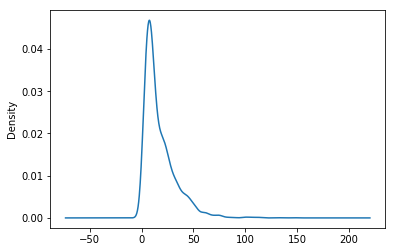

In [136]:
dataInsumo.promedio.plot(kind = 'kde')

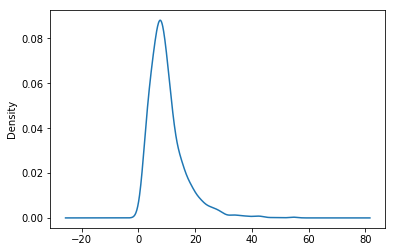

In [137]:
dataInsumo.loc[dataInsumo.fin_de_semana,'promedio'].plot(kind = 'kde')

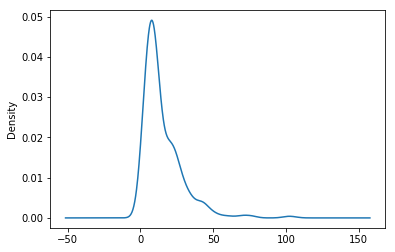

In [138]:
dataInsumo.loc[dataInsumo.LINEA == 'LINEA_A','promedio'].plot(kind = 'kde')

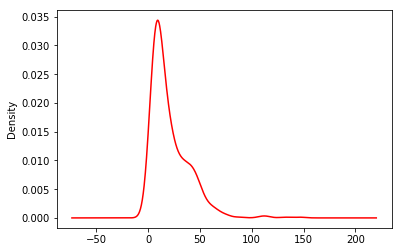

In [139]:
dataInsumo.loc[dataInsumo.LINEA == 'LINEA_B','promedio'].plot(kind = 'kde',color='red')


---

Basado en :

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'17 - Lab 1, part I</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

